# Data preparation for machine learning

With regard to the data used in machine learning models, it is necessary to take into account:

- The data must not contain missing values.
- Categorical variables need to be converted into dummy variables.
- Data standardisation can help to create better models.
- In some cases, it is worth deleting values that differ considerably from others.
- Appropriate transformations of variables may produce better models.
- If the variable to be predicted is categorical, and one of the classes is underrepresented in the training data, then after balancing the data, a better model is usually obtained.

This notebook contains examples of how to deal with these issues.

In [1]:
### Import libraries

import numpy as np
import pandas as pd

In [2]:
### Let's open the data used in the examples

df = pd.read_excel('https://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data1_en.xlsx')

### All rows and columns are shown

pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Display data variables as a list
df.columns

Index(['number', 'sex', 'age', 'family', 'education', 'empl_years', 'salary',
       'management', 'colleagues', 'environment', 'salary_level', 'duties',
       'occu_health', 'timeshare', 'gym', 'massage'],
      dtype='object')

In [3]:
### Information on variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        82 non-null     int64  
 1   sex           82 non-null     int64  
 2   age           82 non-null     int64  
 3   family        82 non-null     int64  
 4   education     81 non-null     float64
 5   empl_years    80 non-null     float64
 6   salary        82 non-null     int64  
 7   management    82 non-null     int64  
 8   colleagues    81 non-null     float64
 9   environment   82 non-null     int64  
 10  salary_level  82 non-null     int64  
 11  duties        82 non-null     int64  
 12  occu_health   47 non-null     float64
 13  timeshare     20 non-null     float64
 14  gym           9 non-null      float64
 15  massage       22 non-null     float64
dtypes: float64(7), int64(9)
memory usage: 10.4 KB


## Missing values

Missing values can be handled in two ways:
- by removing rows with missing values
- by complementing the missing values with appropriate values.

Rows containing missing values can be removed with the __dropna()__ function:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

Missing values can be completed with the __fillna()__ function:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

First let's look at the data by coloring the missing values:

In [4]:
df.style.highlight_null()

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
0,1,1,38,1,1.000000,22.000000,3587,3,3.000000,3,3,3,nan,nan,nan,nan
1,2,1,29,2,2.000000,10.000000,2963,1,5.000000,2,1,3,nan,nan,nan,nan
2,3,1,30,1,1.000000,7.000000,1989,3,4.000000,1,1,3,1.000000,nan,nan,nan
3,4,1,36,2,1.000000,14.000000,2144,3,3.000000,3,3,3,1.000000,nan,nan,nan
4,5,1,24,1,2.000000,4.000000,2183,2,3.000000,2,1,2,1.000000,nan,nan,nan
5,6,2,31,2,2.000000,14.000000,1910,4,4.000000,5,2,4,1.000000,1.000000,nan,nan
6,7,1,49,1,2.000000,16.000000,2066,3,5.000000,4,2,2,nan,nan,1.000000,nan
7,8,1,55,1,1.000000,0.000000,2066,3,5.000000,3,1,3,1.000000,nan,nan,nan
8,9,1,40,2,1.000000,23.000000,2768,2,4.000000,4,2,4,nan,1.000000,nan,nan
9,10,1,33,1,1.000000,16.000000,2106,3,2.000000,1,1,1,1.000000,nan,nan,nan


In the example data, for the last four columns, deleting the rows containing missing values is out of the question, because no data would remain after this.

In the following, rows with missing values in the variables 'education', 'colleagues' and 'empl_years' are deleted and the missing values of the last four variables are filled to zero. By doing this, 3 rows of data will be removed.

In [5]:
df1 = df.dropna(subset=['education', 'colleagues', 'empl_years'])

df1 = df1.fillna({'occu_health':0, 'timeshare':0, 'gym':0, 'massage':0})


### Let's see how many lines we've got left.
df1.shape[0]

79

The following completes all missing values, leaving the original number of rows in the data. Different substitution methods are used for different variables (median, mean, 0).

In [6]:
df2 = df.fillna({'education': df['education'].median(), 
                 'colleagues': df['colleagues'].mean(), 
                 'empl_years': df['empl_years'].mean(), 
                 'ocuu_health':0, 'timeshare':0, 'gym':0, 'massage':0})

# Let's see how many lines we've got left.
df2.shape[0]

82

## Converting categorical variables to dummy variables

The **get_dummies** function of the Pandas library converts categorical variables into dummy variables.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

For example, the sex variable receives values 1 (man) and 2 (woman). Now the get_dummies function makes the sex variable into two variables sex_1 and sex_2. In case of a man, for example, the sex_1 variable is equal to 1. Correspondingly, in case of a woman, the sex_2 variable is equal to 1.

In the following, the sex, family and education variables are converted into dummy variables:

In [7]:
df_dummies = pd.get_dummies(data=df2, columns=['sex', 'family', 'education'])

# Information on variables
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   number         82 non-null     int64  
 1   age            82 non-null     int64  
 2   empl_years     82 non-null     float64
 3   salary         82 non-null     int64  
 4   management     82 non-null     int64  
 5   colleagues     82 non-null     float64
 6   environment    82 non-null     int64  
 7   salary_level   82 non-null     int64  
 8   duties         82 non-null     int64  
 9   occu_health    47 non-null     float64
 10  timeshare      82 non-null     float64
 11  gym            82 non-null     float64
 12  massage        82 non-null     float64
 13  sex_1          82 non-null     uint8  
 14  sex_2          82 non-null     uint8  
 15  family_1       82 non-null     uint8  
 16  family_2       82 non-null     uint8  
 17  education_1.0  82 non-null     uint8  
 18  education_2.

## Standardointi

If the variables are different in magnitude, scaling the variables can in some cases lead to better models. Standardization is a widely used scaling method. In standardization, the values of the variable are converted into z-scores of a normal distribution. The Z-score indicates how many standard deviations the value of the variable is from the mean of all values.

The standardisation can be carried out using the **StandardScaler** function imported from the sclarn.preprocessing library.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### This standardises age, salary and employment years

df2[['age', 'salary', 'empl_years']] = pd.DataFrame(scaler.fit_transform(df2[['age', 'salary', 'empl_years']]))
df2

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
0,1,1,0.005022,1,1.0,1.136570,1.212007,3,3.000000,3,3,3,NaN,0.0,0.0,0.0
1,2,1,-0.921468,2,2.0,-0.251607,0.472806,1,5.000000,2,1,3,NaN,0.0,0.0,0.0
2,3,1,-0.818525,1,1.0,-0.598651,-0.681010,3,4.000000,1,1,3,1.0,0.0,0.0,0.0
3,4,1,-0.200865,2,1.0,0.211119,-0.497394,3,3.000000,3,3,3,1.0,0.0,0.0,0.0
4,5,1,-1.436184,1,2.0,-0.945695,-0.451194,2,3.000000,2,1,2,1.0,0.0,0.0,0.0
5,6,2,-0.715581,2,2.0,0.211119,-0.774594,4,4.000000,5,2,4,1.0,1.0,0.0,0.0
6,7,1,1.137398,1,2.0,0.442481,-0.589794,3,5.000000,4,2,2,NaN,0.0,1.0,0.0
7,8,1,1.755058,1,1.0,-1.408421,-0.589794,3,5.000000,3,1,3,1.0,0.0,0.0,0.0
8,9,1,0.210908,2,1.0,1.252251,0.241806,2,4.000000,4,2,4,NaN,1.0,0.0,0.0
9,10,1,-0.509695,1,1.0,0.442481,-0.542410,3,2.000000,1,1,1,1.0,0.0,0.0,0.0


## Outliers

Values that are unlikely to occur in the normal distribution are considered to be deviating values, outliers. Removing rows containing such values can improve the model in some cases. The point of removing outliers depends on many factors and must be considered in each case separately.

The removal can be done on the basis of the z-scores (standardised values). The Z-score indicates how many standard deviations the value is from the mean of all values. Often the limit is three: if the value of the variable is more than three standard deviations away from the mean, then it is removed.

More information about removing outliers:

https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

In the following, we calculate the probability for the z-scores that are more than three standard deviations away from the mean in their absolute value in a normal distribution:

In [9]:
from scipy import stats

print('The probability that a value is more than three standard deviations away from its mean:', 
      2*stats.norm.cdf(-3))

The probability that a value is more than three standard deviations away from its mean: 0.0026997960632601866


The salary of df2 was standardised above. Now let's take a look at the five highest and lowest z-scores:

In [10]:
df2['salary'].nlargest(n=5)

32    4.399808
16    3.152407
66    2.967607
21    2.736607
23    2.229592
Name: salary, dtype: float64

In [11]:
df2['salary'].nsmallest(n=5)

25   -1.235410
35   -1.190395
53   -1.190395
75   -1.144195
77   -1.144195
Name: salary, dtype: float64

According to the above, the two highest salaries with z-scores greater than three would have to be removed.

Removal can be done with one line of code. The following code works even if z-scores have not already been calculated in the data:

In [13]:
df3 = df2[(np.abs(stats.zscore(df2))<3).all(axis=1)]

### Let's see how many lines we've got left.
df3.shape[0]

0

In [16]:
df2

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
0,1,1,0.005022,1,1.0,1.136570,1.212007,3,3.000000,3,3,3,NaN,0.0,0.0,0.0
1,2,1,-0.921468,2,2.0,-0.251607,0.472806,1,5.000000,2,1,3,NaN,0.0,0.0,0.0
2,3,1,-0.818525,1,1.0,-0.598651,-0.681010,3,4.000000,1,1,3,1.0,0.0,0.0,0.0
3,4,1,-0.200865,2,1.0,0.211119,-0.497394,3,3.000000,3,3,3,1.0,0.0,0.0,0.0
4,5,1,-1.436184,1,2.0,-0.945695,-0.451194,2,3.000000,2,1,2,1.0,0.0,0.0,0.0
5,6,2,-0.715581,2,2.0,0.211119,-0.774594,4,4.000000,5,2,4,1.0,1.0,0.0,0.0
6,7,1,1.137398,1,2.0,0.442481,-0.589794,3,5.000000,4,2,2,NaN,0.0,1.0,0.0
7,8,1,1.755058,1,1.0,-1.408421,-0.589794,3,5.000000,3,1,3,1.0,0.0,0.0,0.0
8,9,1,0.210908,2,1.0,1.252251,0.241806,2,4.000000,4,2,4,NaN,1.0,0.0,0.0
9,10,1,-0.509695,1,1.0,0.442481,-0.542410,3,2.000000,1,1,1,1.0,0.0,0.0,0.0


In this case, removing outliers only resulted in the removal of two rows. 

If you are used to using lambda, then the former can also be done as follows (here z-scores are calculated without the stats.zscore() function):

In [15]:
df4 = df2[df2.apply(lambda x: np.abs(x-x.mean())/x.std()<3).all(axis = 1)]

# Let's see how many lines we've got left.
df4.shape[0]

0

## Logarithmic transformation

Distributions deviating from the normal distribution of the variables can be corrected closer to the normal distribution by transformations of the variables. A widely used transformation to correct for a skewed distribution is to take logarithms.

In the following, the values of the salary variable are converted to their logarithms. The histogram can  be used to quickly check whether the distribution was corrected closer to the normal distribution.

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'salary_log'}>]], dtype=object)

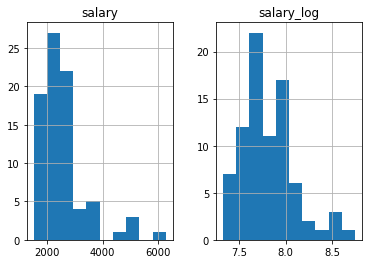

In [17]:
df['salary_log'] = np.log(df['salary'])

# Let's look at the histograms of the variables
df[['salary', 'salary_log']].hist()

The logarithm cannot be calculated from zero. Therefore, the logarithm conversion cannot be used for the employment years of the example data.

If one year is added to the years of service (in which case the variable indicates how many years the person serves in the company), then the logarithmic transformation is successful:

array([[<AxesSubplot:title={'center':'empl_years'}>,
        <AxesSubplot:title={'center':'empl_years_log'}>]], dtype=object)

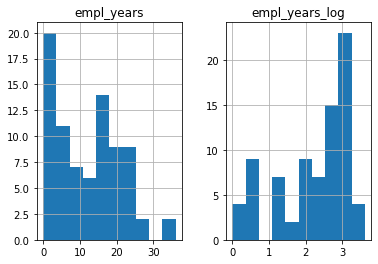

In [19]:
df['empl_years_log'] = np.log(df['empl_years']+1)

df[['empl_years', 'empl_years_log']].hist()

Transformations of variables are used for different purposes and transformations are a broad and complex topic. In addition to the logarithm, many widely used transformations are the square root, raising to the second power, inverse numbers, etc.

## Data balancing

When using classification models, the teaching data should be balanced if one of the classes is clearly underrepresented. There are many ways to do this. See, for ecample, https://towardsdatascience.com/5-techniques-to-work-with-imbalanced-data-in-machine-learning-80836d45d30c. 

An easy way to balance is to use the **unbalanced-learn** library, see  https://imbalanced-learn.org/stable/. The library can be installed in Anaconda from the command line (Anaconda propt):

$$\textrm{conda install -c conda-forge imbalanced-learn}.$$

In [20]:
### If the variable measuring the use of the gym in df2 was the target variable
### so the number of users is underrepresented. 

df2['gym'].value_counts()

0.0    73
1.0     9
Name: gym, dtype: int64

In [21]:
### Import RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

### Independent variables

X = df2.drop('gym', axis=1)

### Target variable

y = df2['gym']

### Balancing

ros = RandomOverSampler(random_state=2)
X, y = ros.fit_resample(X, y)

### Checking the distribution of the target variable
pd.DataFrame(y).value_counts()

gym
0.0    73
1.0    73
dtype: int64

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>

In [24]:
from datetime import datetime
print(f'Last Modified {datetime.now()}')

Last Modified 2022-11-13 19:49:34.694571
